## Instructions for the datasets:

### File name codes:
'\_norm\_bhps': dataset for normalized BHPs <br>
'\_well\_loc': dataset for normalized well locations <br>
'\_train': dataset for pressure (normalized) and saturation <br>

### Old dataset list:
4W_BHP: <br>

    data_dir = '/data/cees/zjin/lstm_rom/datasets/4W_BHP/' <br> 
    data_dir = '/data3/Astro/lstm_rom/explore/data/4W_BHP/' <br>
    
    Training: 100 runs, 2 injectors, 2 producers.
                10 different well locations, each with 10 varying BHP profiles (10x10=100)
                Well location start with 4 wells in the corner, then moving to the middle
    Simulation files are in: /data/cees/zjin/lstm_rom/sim_runs/case2_4w_bhp/
    
9W_BHP: <br>

    data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_BHP/' <br> 
    data_dir = '/data3/Astro/lstm_rom/explore/data/9W_BHP/' <br>
    
    Training: 400 runs, 4 injectors, 5 producers. First 100 runs with high BHP on well 1, and lower BHP on the rest. 
                Same for the following 100, and 100 ...
                All wells with BHP control.
                Fixed well locations.
    Simulation files are in: /data/cees/zjin/lstm_rom/sim_runs/case3_9w_bhp/run_sims_single_out.ipynb

    
9W_BHP_RATE: <br>

    data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_BHP/' <br> 
    data_dir = '/data3/Astro/lstm_rom/explore/data/9W_BHP_RATE/' <br>
    
    Training: 400 runs. Same as 9W_BHP. But all 4 injectors are with rate control
                Fixed well locations.
    Simulation files are in: /data/cees/zjin/lstm_rom/sim_runs/case4_9w_bhp_rate/
    
### Additional datasets

(1): <br>

    data_dir = '/data3/Astro/lstm_rom/explore/data/9w_bhp_wl/' <br>
    filename = 'pres_sat.mat' full-order pressure and saturation <br>
    Training: 100 runs with varying BHPs and well locations. <br>
    Format of the file is a bit different (modified by Yimin). (36000000,), which is 100 runs x 100 steps x 3600 grids <br>
    Original sim file in /data/cees/zjin/lstm_rom/sim_runs/case3_9w_bhp_rate/run_sims.ipynb <br>

(2):<br>

### New datasets
case_name: 9w_bhp or 9w_bhp_rate <br>
case_suffix: single_out, fix_wl <br>
rel_x means realization number <br>
model_suffix: no_p <br>
    

In [1]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
plt.set_cmap('jet')

In [2]:
# data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_BHP/'
# data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_BHP_RATE/'
# data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_MS_BHP_RATE/'
data_dir = '/data3/Astro/personal/zjin/datasets/9W_MS_BHP_RATE_GAU/'

# case_name = '9w_bhp'
# case_name = '9w_bhp_rate'
case_name = '9w_ms_bhp_rate'

state_file = case_name + '_train_n_400_full'
ctrl_file = case_name + '_norm_bhps_n_400'

# case_suffix = '_single_out_rel_3'
# case_suffix = '_single_out_rel_2'
# case_suffix = '_single_out_rel_1'
# case_suffix = '_fix_wl_rel_1'
case_suffix = '_fix_wl_rel_8'
train_suffix = '_with_p'

state_data = state_file + case_suffix + '.mat'
ctrl_data = ctrl_file + case_suffix + '.mat'

In [3]:
hf_r = h5py.File(data_dir + state_data, 'r')
sat = np.array(hf_r.get('sat'))
pres = np.array(hf_r.get('pres'))
hf_r.close()

In [4]:
print(sat.shape)
sat = sat.T.reshape((400, 201, 3600))
pres = pres.T.reshape(400,201,3600)
print("sat shape:{}".format(sat.shape))
print("pres shape:{}".format(pres.shape))

(3600, 80400)
sat shape:(400, 201, 3600)
pres shape:(400, 201, 3600)


In [5]:
print(np.min(sat))
print(np.max(sat))

0.12278932179024149
0.6364830969098375


In [6]:
# s_max = 0.6
# s_min = 0.1229

# s_diff = s_max - s_min
# sat0 = (sat - s_min) / s_diff

In [7]:
# do not repeatly run this
# sat = sat0
# print(np.min(sat))
# print(np.max(sat))

In [8]:
dt = 10 # timestep, not days

case number: 1
case number: 101
case number: 201
case number: 301


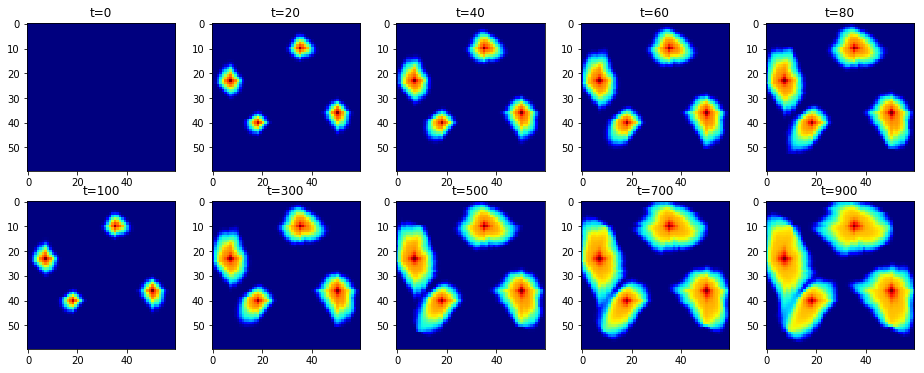

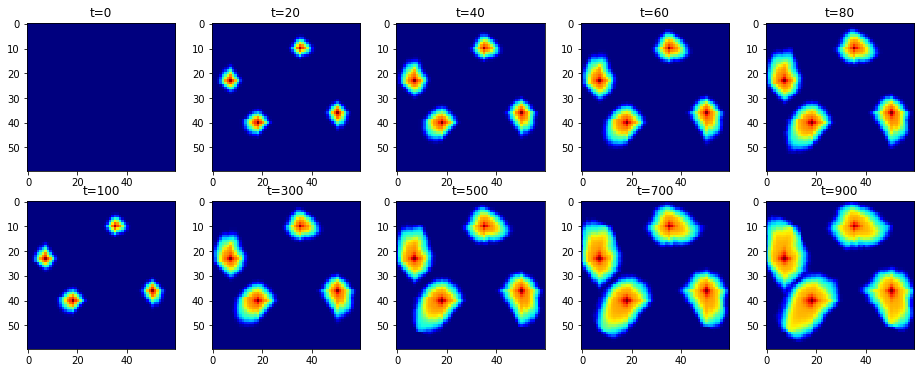

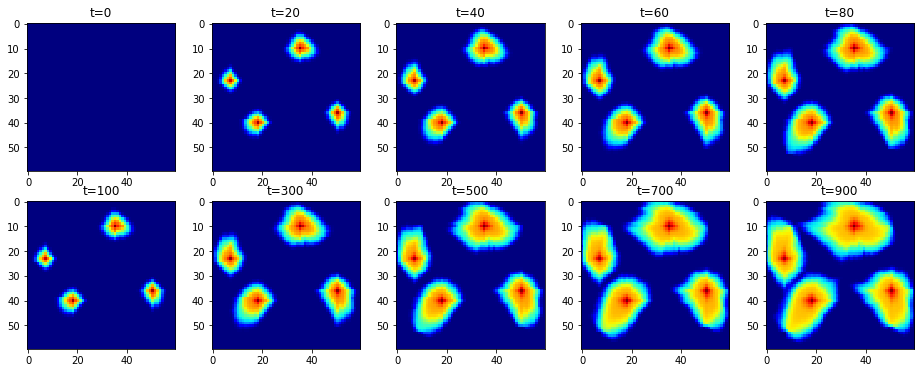

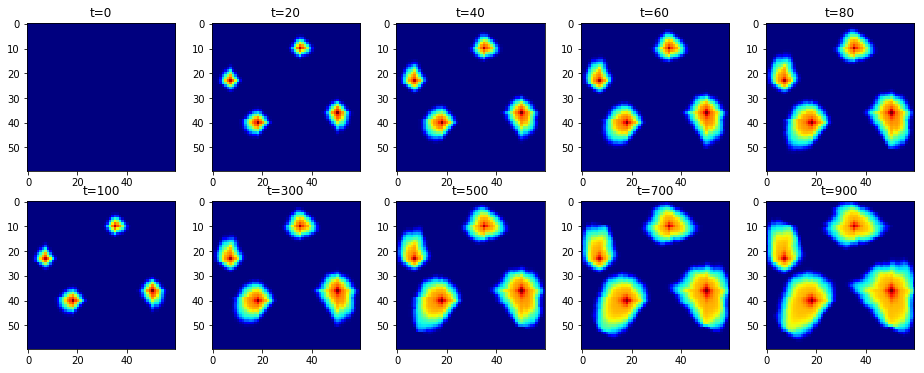

In [9]:
for k in range(4):
    i_case = 100*k+1
    print("case number: %d"%(i_case))
    plt.figure(figsize=(16,6))
    for t in range(5):
        plt.subplot(2,5, t+1)
        plt.imshow(sat[i_case, t*10, :].reshape((60,60)))
        plt.title("t=%d"%(t*2*dt))
    for t in range(5):
        plt.subplot(2,5, t+6)
        plt.imshow(sat[i_case, 20*t+10, :].reshape((60,60)))
        plt.title("t=%d"%((t*20+10)*dt))
plt.show()

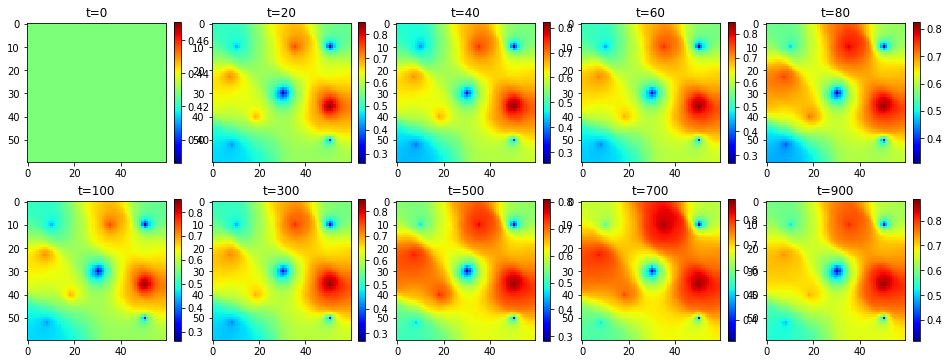

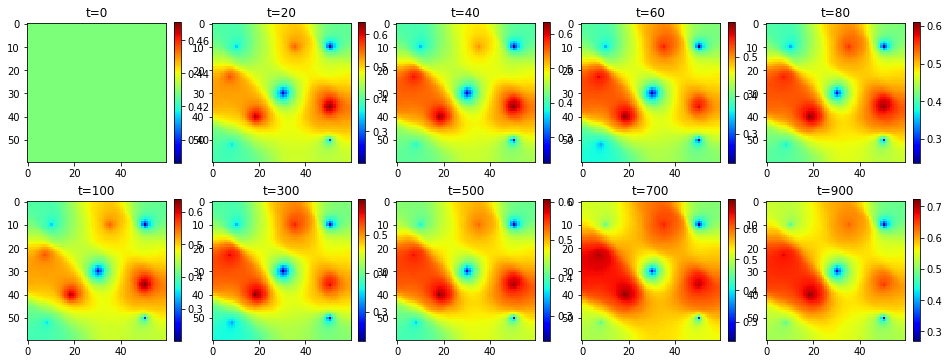

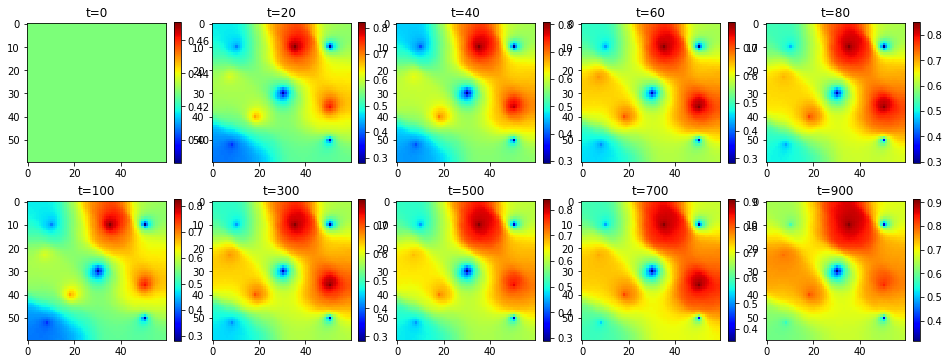

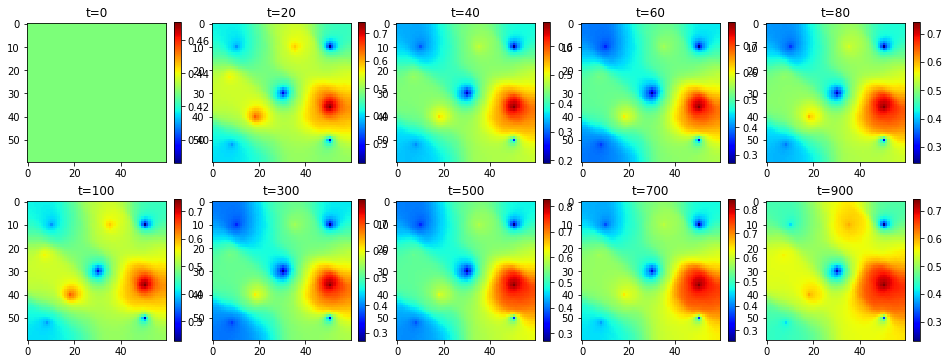

In [10]:
for k in range(4):
    i_case = 100*k+1
    plt.figure(figsize=(16,6))
    for t in range(5):
        plt.subplot(2,5, t+1)
        plt.imshow(pres[i_case, t*10, :].reshape((60,60)))
        plt.title("t=%d"%(t*2*dt))
        plt.colorbar(fraction=0.046)
    for t in range(5):
        plt.subplot(2,5, t+6)
        plt.imshow(pres[i_case, 20*t+10, :].reshape((60,60)))
        plt.title("t=%d"%((t*20+10)*dt))
        plt.colorbar(fraction=0.046)
plt.show()

(400, 201, 3600)


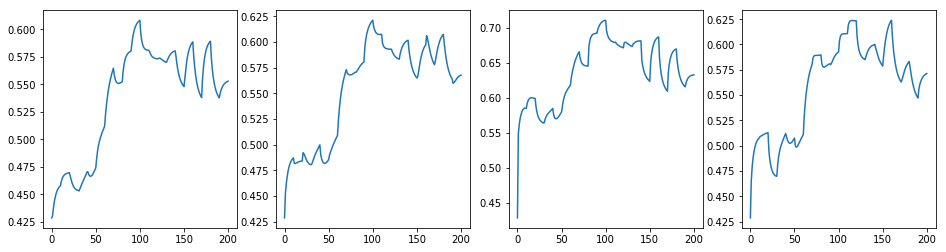

In [11]:
k=[1220, 1240, 2420, 2440]
print(pres.shape)
plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.plot(range(201), pres[101,:,k[i]])

(400, 201, 3600)


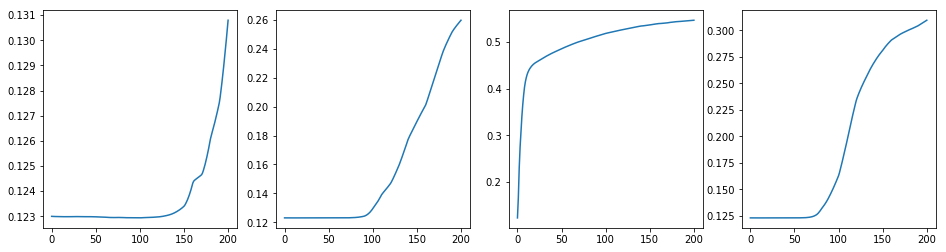

In [12]:
k=[1220, 1240, 2420, 2440]
print(pres.shape)
plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.plot(range(201), sat[101,:,k[i]])

#### Constant dt, use the following block (varying dt TBD)

In [13]:
dt = 10 # time step increment, not days
t_interval = 10 # not used, days

indt = np.array(range(0,200,dt))
indt1 = indt + dt
print(indt)
print(indt1)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]
[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200]


In [14]:
sat_t = sat[:, indt,:]
sat_t1 = sat[:, indt1, :]

pres_t = pres[:, indt,:]
pres_t1 = pres[:, indt1,:]

# we need a delta t
indt_del = indt1 - indt
print(indt_del)

indt_del = indt_del / max(indt_del)
print(indt_del)

[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
# print(sat_t1.shape)
# print(pres_t1.shape)

num_t = sat_t.shape[1]
num_case = sat_t.shape[0]

print("num_t:%d"%num_t)
print("num_case:%d"%num_case)

num_t:20
num_case:400


In [16]:
num_prod = 5
num_inj = 4
num_well = num_prod + num_inj

## Read control data

In [17]:
hf_r = h5py.File(data_dir + ctrl_data)
bhp0 = np.array(hf_r.get('bhp'))
rate0 = np.array(hf_r.get('rate'))
hf_r.close()

In [18]:
print(bhp0.shape)
print(rate0.shape)

(400, 100)
(400, 80)


In [19]:
num_ctrl = bhp0.shape[1] // num_prod
assert bhp0.shape[1] // num_prod == rate0.shape[1] // num_inj, "num_ctrl error!"
print(num_ctrl)

20


In [20]:
bhp = np.concatenate((bhp0,rate0),axis=1)
print(bhp.shape)

(400, 180)


## Manipulate control data shape

In [21]:
# with 2 bhps per period
num_step = len(indt)
print(num_step)

20


In [22]:
bhp_b0 = bhp.reshape(num_case, num_well, num_ctrl)
bhp_b1 = np.repeat(bhp_b0[..., np.newaxis], num_step // num_ctrl, axis=3)
assert num_step // num_ctrl * num_ctrl == num_step, "no exaxt division num_step = %d, num_ctrl=%d"%(num_step, num_ctrl)

print(bhp_b1.shape)
bhp_b2 = bhp_b1.reshape(num_case, num_well, num_step)
print(bhp_b2.shape)

(400, 9, 20, 1)
(400, 9, 20)


In [23]:
tmp = np.array(range(num_step)) - 1
tmp1 = np.array(range(num_step))
tmp[0] = 0

print(tmp)
print(tmp1)

[ 0  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [24]:
bhp_tt = bhp_b2[:,:, tmp]
bhp_tt1 = bhp_b2[:,:, tmp1]
print(bhp_tt.shape)
print(bhp_tt1.shape)

bhp_tt0 = np.concatenate((bhp_tt, bhp_tt1), axis=1)
bhp_t = np.swapaxes(bhp_tt0,1,2)
print(bhp_t.shape)
print(bhp.shape)
print(bhp[0,:20]) # these two should be same
print(bhp_t[0,:,9]) # these two should be same
print(bhp_t[0,:,0])

(400, 9, 20)
(400, 9, 20)
(400, 20, 18)
(400, 180)
[0.07301817 0.14255434 0.12567122 0.11029385 0.1277352  0.07266851
 0.0917922  0.08716265 0.09381979 0.11104927 0.09212099 0.06576399
 0.11189337 0.14246813 0.1212841  0.06638636 0.11117457 0.09718268
 0.10476884 0.10050483]
[0.07301817 0.14255434 0.12567122 0.11029385 0.1277352  0.07266851
 0.0917922  0.08716265 0.09381979 0.11104927 0.09212099 0.06576399
 0.11189337 0.14246813 0.1212841  0.06638636 0.11117457 0.09718268
 0.10476884 0.10050483]
[0.07301817 0.07301817 0.14255434 0.12567122 0.11029385 0.1277352
 0.07266851 0.0917922  0.08716265 0.09381979 0.11104927 0.09212099
 0.06576399 0.11189337 0.14246813 0.1212841  0.06638636 0.11117457
 0.09718268 0.10476884]


do not run the following block if you are not sure what you are doing

In [25]:
# # with 1 bhp per period
# print(bhp.shape)
# bhp_tt0 = np.repeat(bhp[:,:, np.newaxis], num_t, axis=2)
# bhp_t = np.swapaxes(bhp_tt0,1,2)
# print(bhp_t.shape)

In [26]:
n_ctrl = bhp_t.shape[2]
print(n_ctrl)

18


In [27]:
# extend dimension of delta_t
print(indt_del.shape)
indt_dd = np.repeat(indt_del[np.newaxis,:], num_case, axis = 0)
indt_d = indt_dd[:,:,np.newaxis]
print(indt_d.shape)

(20,)
(400, 20, 1)


In [28]:
print(indt)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]


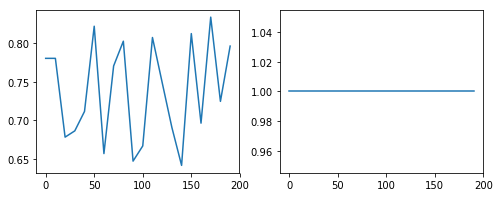

In [29]:
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.plot(indt, bhp_t[0,:,7])
plt.subplot(122)
plt.plot(indt, indt_d[0,:,0])

In [30]:
print(sat_t.shape)
print(pres_t.shape)
print(indt_d.shape)

(400, 20, 3600)
(400, 20, 3600)
(400, 20, 1)


### check desired shapes

In [31]:
print(sat_t.shape)
print(sat_t1.shape)
print(pres_t.shape)
print(pres_t1.shape)
print(bhp_t.shape)
print(indt_d.shape)

(400, 20, 3600)
(400, 20, 3600)
(400, 20, 3600)
(400, 20, 3600)
(400, 20, 18)
(400, 20, 1)


### Pick a fraction of non-changing control periods, and all changing control periods

In [32]:
print(bhp_t[0, 15, [0,9]])
slt_col = np.array((range(0, 100, 5)))
print(slt_col)
#
np.random.seed(1047)
slt_col_2 = np.random.randint(1,5,size=20) + slt_col
print(slt_col_2- slt_col)

slt_cols = np.sort(np.concatenate((slt_col, slt_col_2), axis=0))
print(slt_cols)

[0.1212841  0.06638636]
[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]
[3 1 3 1 4 4 2 1 2 2 4 3 2 3 3 4 2 3 3 2]
[ 0  3  5  6 10 13 15 16 20 24 25 29 30 32 35 36 40 42 45 47 50 54 55 58
 60 62 65 68 70 73 75 79 80 82 85 88 90 93 95 97]


### If choose not to pick column, run the following one block

In [33]:
slt_cols = np.array((range(num_t)))
print(slt_cols)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [34]:
num_t_slt = slt_cols.shape[0]
print(num_t)
sat_t_slt = sat_t[:,slt_cols,:]
sat_t1_slt = sat_t1[:,slt_cols,:]
pres_t_slt = pres_t[:,slt_cols,:]
pres_t1_slt = pres_t1[:,slt_cols,:]
bhp_t_slt = bhp_t[:,slt_cols,:]
indt_d_slt = indt_d[:,slt_cols,:]

print(sat_t_slt.shape)
print(sat_t1_slt.shape)
print(pres_t_slt.shape)
print(pres_t1_slt.shape)
print(bhp_t_slt.shape)
print(indt_d_slt.shape)

20
(400, 20, 3600)
(400, 20, 3600)
(400, 20, 3600)
(400, 20, 3600)
(400, 20, 18)
(400, 20, 1)


## Train/Test split

In [35]:
num_run_per_case = 75
sat_t_train = np.zeros((num_run_per_case*4, num_t_slt, 3600))
sat_t1_train = np.zeros((num_run_per_case*4, num_t_slt, 3600))
bhp_train = np.zeros((num_run_per_case*4, num_t_slt, n_ctrl))
dt_train = np.zeros((num_run_per_case*4, num_t_slt, 1))

pres_t_train = np.zeros((num_run_per_case*4, num_t_slt, 3600))
pres_t1_train = np.zeros((num_run_per_case*4, num_t_slt, 3600))


num_run_eval = 100 - num_run_per_case # 25 cases
sat_t_eval = np.zeros((num_run_eval*4, num_t_slt, 3600))
sat_t1_eval = np.zeros((num_run_eval*4, num_t_slt, 3600))

bhp_eval = np.zeros((num_run_eval*4, num_t_slt, n_ctrl))
dt_eval = np.zeros((num_run_eval*4, num_t_slt, 1))

pres_t_eval = np.zeros((num_run_eval*4, num_t_slt, 3600))
pres_t1_eval = np.zeros((num_run_eval*4, num_t_slt, 3600))


for k in range(4):
    ind0 = k * num_run_per_case
    sat_t_train[ind0:ind0+num_run_per_case,...] = sat_t_slt[k*100:k*100+num_run_per_case, :, :]
    sat_t1_train[ind0:ind0+num_run_per_case,...] = sat_t1_slt[k*100:k*100+num_run_per_case, :, :]
    pres_t_train[ind0:ind0+num_run_per_case,...] = pres_t_slt[k*100:k*100+num_run_per_case, :, :]
    pres_t1_train[ind0:ind0+num_run_per_case,...] = pres_t1_slt[k*100:k*100+num_run_per_case, :, :]
    bhp_train[ind0:ind0+num_run_per_case,...] = bhp_t_slt[k*100: k*100+num_run_per_case, :, :]
    dt_train[ind0:ind0+num_run_per_case,...] = indt_d_slt[k*100: k*100+num_run_per_case, :, :]
    # Eval set
    ind1 = k*num_run_eval
    sat_t_eval[ind1:ind1+num_run_eval,...] = sat_t_slt[k*100+num_run_per_case:k*100+100, :, :]
    sat_t1_eval[ind1:ind1+num_run_eval,...] = sat_t1_slt[k*100+num_run_per_case:k*100+100, :, :]
    pres_t_eval[ind1:ind1+num_run_eval,...] = pres_t_slt[k*100+num_run_per_case:k*100+100, :, :]
    pres_t1_eval[ind1:ind1+num_run_eval,...] = pres_t1_slt[k*100+num_run_per_case:k*100+100, :, :]
    bhp_eval[ind1:ind1+num_run_eval,...] = bhp_t_slt[k*100+num_run_per_case: k*100+100, :, :]
    dt_eval[ind1:ind1+num_run_eval,...] = indt_d_slt[k*100+num_run_per_case: k*100+100, :, :]

In [36]:
print(sat_t_train.shape)
print(sat_t1_train.shape)
print(pres_t_train.shape)
print(pres_t1_train.shape)
print(bhp_train.shape)
print(dt_train.shape)

print(sat_t_eval.shape)
print(sat_t1_eval.shape)
print(pres_t_eval.shape)
print(pres_t1_eval.shape)
print(bhp_eval.shape)
print(dt_eval.shape)

n_train_run = sat_t_train.shape[0]
n_eval_run = sat_t_eval.shape[0]

(300, 20, 3600)
(300, 20, 3600)
(300, 20, 3600)
(300, 20, 3600)
(300, 20, 18)
(300, 20, 1)
(100, 20, 3600)
(100, 20, 3600)
(100, 20, 3600)
(100, 20, 3600)
(100, 20, 18)
(100, 20, 1)


In [37]:
sat_t_train = sat_t_train.reshape((num_run_per_case*4*num_t_slt, 60, 60, 1))
sat_t1_train = sat_t1_train.reshape((num_run_per_case*4*num_t_slt, 60, 60, 1))
pres_t_train = pres_t_train.reshape((num_run_per_case*4*num_t_slt, 60, 60, 1))
pres_t1_train = pres_t1_train.reshape((num_run_per_case*4*num_t_slt, 60, 60, 1))
bhp_train = bhp_train.reshape((num_run_per_case*4*num_t_slt, n_ctrl))
dt_train = dt_train.reshape((num_run_per_case*4*num_t_slt, 1))
# Eval
sat_t_eval = sat_t_eval.reshape((num_run_eval*4*num_t_slt, 60, 60, 1))
sat_t1_eval = sat_t1_eval.reshape((num_run_eval*4*num_t_slt, 60, 60, 1))
pres_t_eval = pres_t_eval.reshape((num_run_eval*4*num_t_slt, 60, 60, 1))
pres_t1_eval = pres_t1_eval.reshape((num_run_eval*4*num_t_slt, 60, 60, 1))
bhp_eval = bhp_eval.reshape((num_run_eval*4*num_t_slt, n_ctrl))
dt_eval = dt_eval.reshape((num_run_eval*4*num_t_slt, 1))

In [38]:
print(sat_t_train.shape)
print(sat_t1_train.shape)
print(pres_t_train.shape)
print(pres_t1_train.shape)
print(bhp_train.shape)
print(dt_train.shape)


print(sat_t_eval.shape)
print(sat_t1_eval.shape)
print(pres_t_eval.shape)
print(pres_t1_eval.shape)
print(bhp_eval.shape)
print(dt_eval.shape)

n_train_step = sat_t_train.shape[0]
n_eval_step = sat_t_eval.shape[0]
print(n_train_step)
print(n_eval_step)

(6000, 60, 60, 1)
(6000, 60, 60, 1)
(6000, 60, 60, 1)
(6000, 60, 60, 1)
(6000, 18)
(6000, 1)
(2000, 60, 60, 1)
(2000, 60, 60, 1)
(2000, 60, 60, 1)
(2000, 60, 60, 1)
(2000, 18)
(2000, 1)
6000
2000


In [49]:
state_t_train = np.concatenate((sat_t_train, pres_t_train),axis=3)
state_t1_train = np.concatenate((sat_t1_train, pres_t1_train),axis=3)

state_t_eval = np.concatenate((sat_t_eval, pres_t_eval),axis=3)
state_t1_eval = np.concatenate((sat_t1_eval, pres_t1_eval),axis=3)

print(state_t_train.shape)
print(state_t1_train.shape)
print(state_t_eval.shape)
print(state_t1_eval.shape)

(6000, 60, 60, 2)
(6000, 60, 60, 2)
(2000, 60, 60, 2)
(2000, 60, 60, 2)


In [40]:
num_train = num_run_per_case*4*num_t_slt
shuffle_ind_train = np.random.permutation(num_train)
state_t_train = state_t_train[shuffle_ind_train, ...]
state_t1_train = state_t1_train[shuffle_ind_train, ...]
bhp_train = bhp_train[shuffle_ind_train, ...]
dt_train = dt_train[shuffle_ind_train, ...]

In [41]:
num_eval = num_run_eval*4*num_t_slt
shuffle_ind_eval = np.random.permutation(num_eval)
state_t_eval = state_t_eval[shuffle_ind_eval, ...]
state_t1_eval = state_t1_eval[shuffle_ind_eval, ...]
bhp_eval = bhp_eval[shuffle_ind_eval, ...]
dt_eval = dt_eval[shuffle_ind_eval, ...]

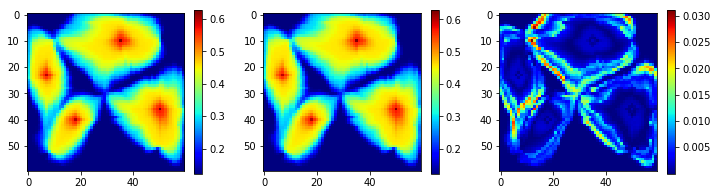

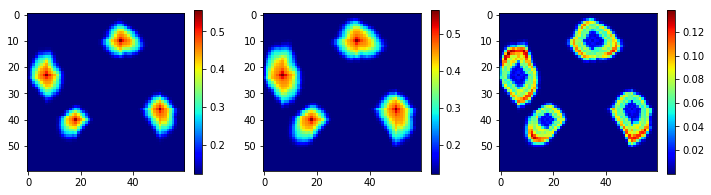

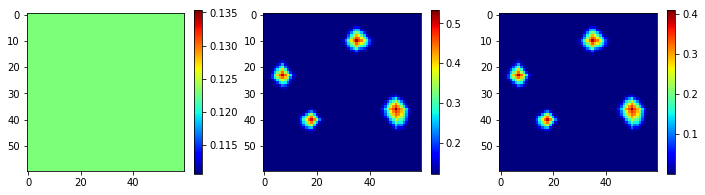

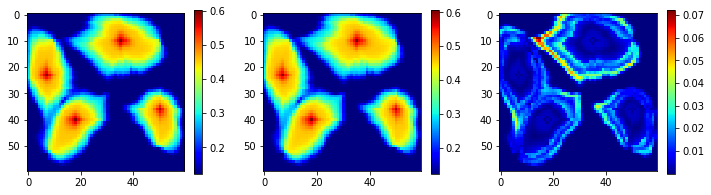

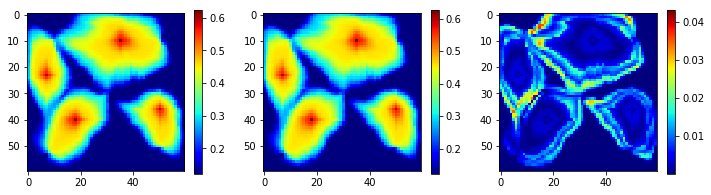

In [42]:
# k = [0,1,2,3]
k = list(range(0,10,2))
for i in range(len(k)):
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    plt.imshow(state_t_train[k[i], :,:,0])
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.imshow(state_t1_train[k[i], :,:,0])
    plt.colorbar()
    plt.subplot(1,3,3)
    plt.imshow(np.fabs(state_t1_train[k[i], :,:,0] - state_t_train[k[i],:,:,0]))
    plt.colorbar()
plt.show()

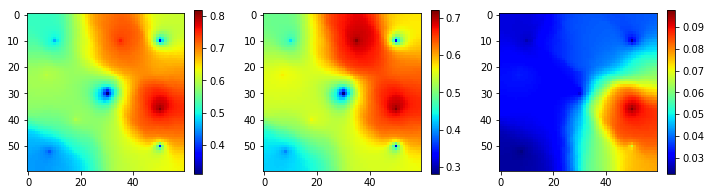

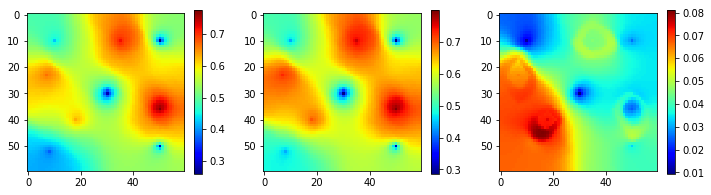

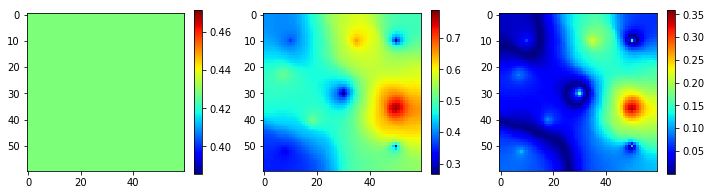

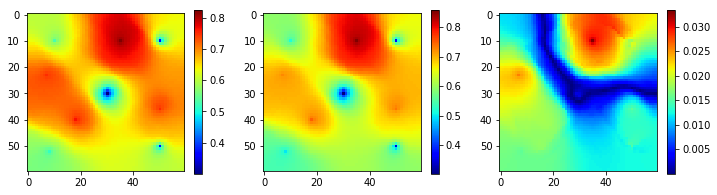

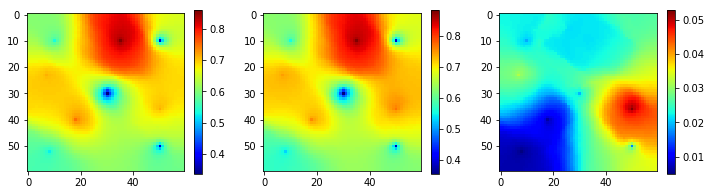

In [43]:
for i in range(len(k)):
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    plt.imshow(state_t_train[k[i], :,:,1])
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.imshow(state_t1_train[k[i], :,:,1])
    plt.colorbar()
    plt.subplot(1,3,3)
    plt.imshow(np.fabs(state_t1_train[k[i], :,:,1] - state_t_train[k[i],:,:,1]))
    plt.colorbar()
plt.show()

In [55]:
# select subset of training
n_train_step = 2000
state_t_train = state_t_train[:n_train_step, ...]
state_t1_train = state_t1_train[:n_train_step, ...]
bhp_train = bhp_train[:n_train_step, ...]
dt_train = dt_train[:n_train_step, ...]

In [56]:
print(dt_train.shape)
dt = 100 # days

(2000, 1)


In [57]:
hf_w = h5py.File(data_dir + case_name + '_e2c_train' + case_suffix + train_suffix+ '_n%d_dt%dday_nt%d_nrun%d.mat' %(n_train_step, dt, num_t_slt, n_train_run), 'w')
hf_w.create_dataset('state_t', data=state_t_train)
hf_w.create_dataset('state_t1', data=state_t1_train)
hf_w.create_dataset('bhp', data = bhp_train)
hf_w.create_dataset('dt', data = dt_train)
hf_w.close()

In [58]:
print(bhp_eval.shape)
print(dt_eval.shape)

(2000, 18)
(2000, 1)


In [59]:
hf_w = h5py.File(data_dir + case_name + '_e2c_eval' + case_suffix + train_suffix+'_n%d_dt%dday_nt%d_nrun%d.mat'%(n_eval_step, dt, num_t_slt, n_eval_run), 'w')
hf_w.create_dataset('state_t', data=state_t_eval)
hf_w.create_dataset('state_t1', data=state_t1_eval)
hf_w.create_dataset('bhp', data = bhp_eval)
hf_w.create_dataset('dt', data = dt_eval)
hf_w.close()